# RNN Sentiment Analysis

Import Dependencies

In [1]:
%store -r initial_processing_df

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

import pandas as pd
import seaborn as sns
import keras


In [2]:
df = initial_processing_df
df.head(14)

,Review,Rating,Positive,Character_Count,Word_count,id
0,nice hotel expensive parking got good deal sta...,4,1,593,87,1
1,ok nothing special charge diamond member hilto...,2,0,1689,250,2
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427,217,3
3,"unique, great stay, wonderful time hotel monac...",5,1,600,89,4
4,"great stay great stay, went seahawk game aweso...",5,1,1281,191,5
5,love monaco staff husband stayed hotel crazy w...,5,1,1002,134,6
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,748,101,7
7,"excellent staff, housekeeping quality hotel ch...",4,1,597,85,8
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,419,59,9
9,excellent stayed hotel monaco past w/e delight...,5,1,271,35,10


## Splitting Data to Train Test

In [3]:
x = df['Review']
y = df['Positive']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print("shape of x_train:", x_train.shape)
print("shape of x_test:", x_test.shape)

print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)


shape of x_train: (16392,)
shape of x_test: (4099,)
shape of y_train: (16392,)
shape of y_test: (4099,)


# More Preprocessing

It's apparent that the reviews vary in lengths, which is problematic. Neural networks cannot accept data of different lengths. Therefore, it is imperative that we standardize the length of each review. To accomplish this, we need to:

* Determine a fxied number of word.
* Tokenize the words.
* Pad the text.

In [5]:
# Checking mean and std
df["Word_count"].describe()

count    20491.000000
mean       104.375824
std        100.656586
min          7.000000
25%         48.000000
50%         77.000000
75%        124.000000
max       1931.000000
Name: Word_count, dtype: float64

## Visual Inspection

Upon careful examination of both visuals, it becomes apparent that 250 words represents the optimal maximum word count.

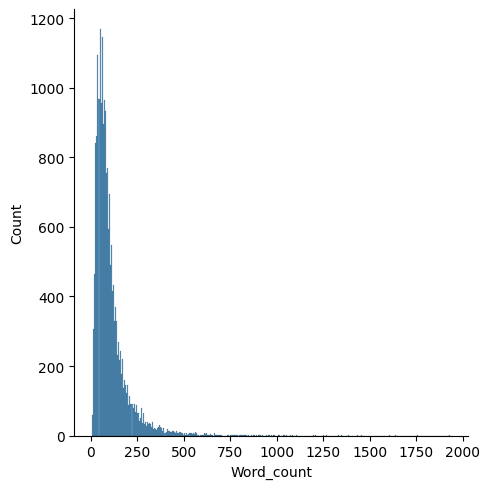

In [6]:
sns.displot(df["Word_count"])

<Axes: >

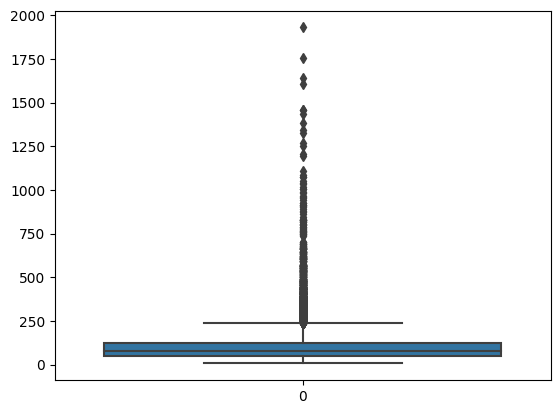

In [7]:
sns.boxplot(df["Word_count"])

## IQR Method
To ensure accuracy, I will also use the IQR method to verify the validity or proximity of my observation.

In [8]:
q1 = df["Word_count"].quantile(0.25)
q3 = df["Word_count"].quantile(0.75)
iqr = q3-q1

The upper limit, which is 238, closely aligns with my observation. Therefore, I will round it up to 250.

In [9]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

upper_limit, lower_limit

(238.0, -66.0)

## Tokenizing the text. Creates a word-to-index dictionary

Once a word is tokenized, the assigned number represents its frequency within the text. The number 1 corresponds to the most frequently occurring word, and so forth.

In [10]:
# This is what the words look like before getting tokenized
print(x_train[4])
print(y_train[4])

great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, great walk did n't mind, right christmas wonderful lights, homeless stowed away building entrances leave, police presence not greatest area stadium, activities 7 blocks pike street waterfront great coffee shops way, hotel mantained foyer awesome, wine tasting available evening, best dog, taking st. bernard time family, safes hotel located service desk room, bathroom huge jetted tub huge, funny house kee

In [11]:
tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)



In [12]:
# This is what the words look like after beeing tokenized
print(x_train[4])
print(y_train[4])

[31, 1, 15, 1, 833, 1, 71, 12, 27, 22, 194, 22, 46, 44, 10, 550, 422, 23, 3, 768, 7, 170, 27, 31, 1, 6, 14, 321, 279, 547, 216, 287, 319, 40, 359, 40, 36, 275, 151, 232, 359, 129, 97, 141, 781, 248, 151, 241, 523, 50, 42, 1, 351, 38, 23, 7, 31, 4, 40, 359, 98, 1, 694, 163, 57, 775, 11, 781, 22, 334, 8, 775]
1


## Padding the text

* If a review exceeds 250 words, we will remove the excess words.
* If a review contains less than 250 words, we will append zeros to it until it reaches a length of 750 words.

In [13]:
# Word lenghts before padding
len(x_train[0]), len(x_train[1]), len(x_train[2]), len(x_train[3]), len(x_train[4])

(60, 58, 66, 93, 72)

In [14]:
# Max length of words
MAXLEN = 250

x_train = keras.utils.pad_sequences(x_train, MAXLEN)
x_test = keras.utils.pad_sequences(x_test, MAXLEN)

In [15]:
# Word lenghts after padding
len(x_train[0]), len(x_train[1]), len(x_train[2]), len(x_train[3]), len(x_train[4])

(250, 250, 250, 250, 250)

In [16]:
# And this is what it looks like if we take a closer look
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   